## Abalone

In [313]:
# Data frames.
import pandas as pd

# Lists
import numpy as np

# Plots
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [314]:
# Reading and saving data from abalone.csv as a pandas database
abaloneData = pd.read_csv("data/abalone.csv")

# Checking shape
abaloneShape = abaloneData.shape
print("abaloneData has {} rows and {} columns".format(abaloneShape[0], abaloneShape[1]))

# A look at the data
abaloneData.head()

abaloneData has 4177 rows and 9 columns


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [315]:
# Checking data types
abaloneData.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

### Attribute information

Attribute information taken from data source. Ref: https://archive.ics.uci.edu/dataset/1/abalone



| Name           | Data Type | Meas.      | Description                       |
| -------------- | ----------| ---------- | --------------------------------- |
| Sex            | nominal   | M, F, and I| (infant)                          |
| Length         | continuous| mm         | Longest shell measurement         |
| Diameter       | continuous| mm         | perpendicular to length           |
| Height         | continuous| mm         | with meat in shell                |
| Whole weight   | continuous| grams      | whole abalone                     |
| Shucked weight | continuous| grams      | weight of meat                    |
| Viscera weight | continuous| grams      | gut weight (after bleeding)       |
| Shell weight   | continuous| grams      | after being dried                 |
| Rings          | integer   |            | +1.5 gives the age in years       |

In [316]:
# Putting this attribute information into a callable database

attributeInformation = {
    "Name": [
        "Sex", "Length", "Diameter", "Height", "Whole weight", 
        "Shucked weight", "Viscera weight", "Shell weight", "Rings"
    ],
    "Data Type": [
        "nominal", "continuous", "continuous", "continuous", "continuous", 
        "continuous", "continuous", "continuous", "integer"
    ],
    "Meas.": [
        ["M", "F", "I"], "mm", "mm", "mm", "grams", 
        "grams", "grams", "grams", "total count"
    ],
    "Description": [
        "(infant)", "Longest shell measurement", "perpendicular to length", 
        "with meat in shell", "whole abalone", "weight of meat", 
        "gut weight (after bleeding)", "after being dried", "+1.5 gives the age in years"
    ]
}

In [317]:
# Cleaning Data of NaN values
abaloneData.dropna()

# Getting change in data shape
deltaRows = int(abaloneShape[0])-int(abaloneData.shape[0])
deltaColumns = int(abaloneShape[1])-int(abaloneData.shape[1])

# Checking shape post cleaning
print("abaloneData has lost {} rows and {} columns".format((deltaRows),
        (deltaColumns)))

abaloneData has lost 0 rows and 0 columns


The data has not lost any rows or columns, meaning all cells are populated with data

### Plotting data

In [318]:
def plotHistDensity(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Getting the units of the variables
    unit = attributeInformation['Meas.']
    
    # Making the plot large
    plt.figure(figsize=(15, 15))

    num_cols = len(abaloneCols)
    for i in range(1, num_cols):
        plt.subplot(3, 3, i)

        # Plot the density histogram
        plt.hist(data[abaloneCols[i]], bins=30, density=True, color='dodgerblue', edgecolor='black')

        # Calculate mean and standard deviation
        mean_value = data[abaloneCols[i]].mean()
        
        # Plot the mean line
        plt.axvline(mean_value, color='red', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
        
        # Adding a title and labels
        plt.title(f"Mean {abaloneColsNames[i]}", size=15, color='black')
        plt.xlabel(f"{abaloneColsNames[i]} ({unit[i]})", size=12, color='black')
        plt.ylabel('Density', size=12, color='black')
        plt.legend(loc='upper right')
        plt.grid(True)

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


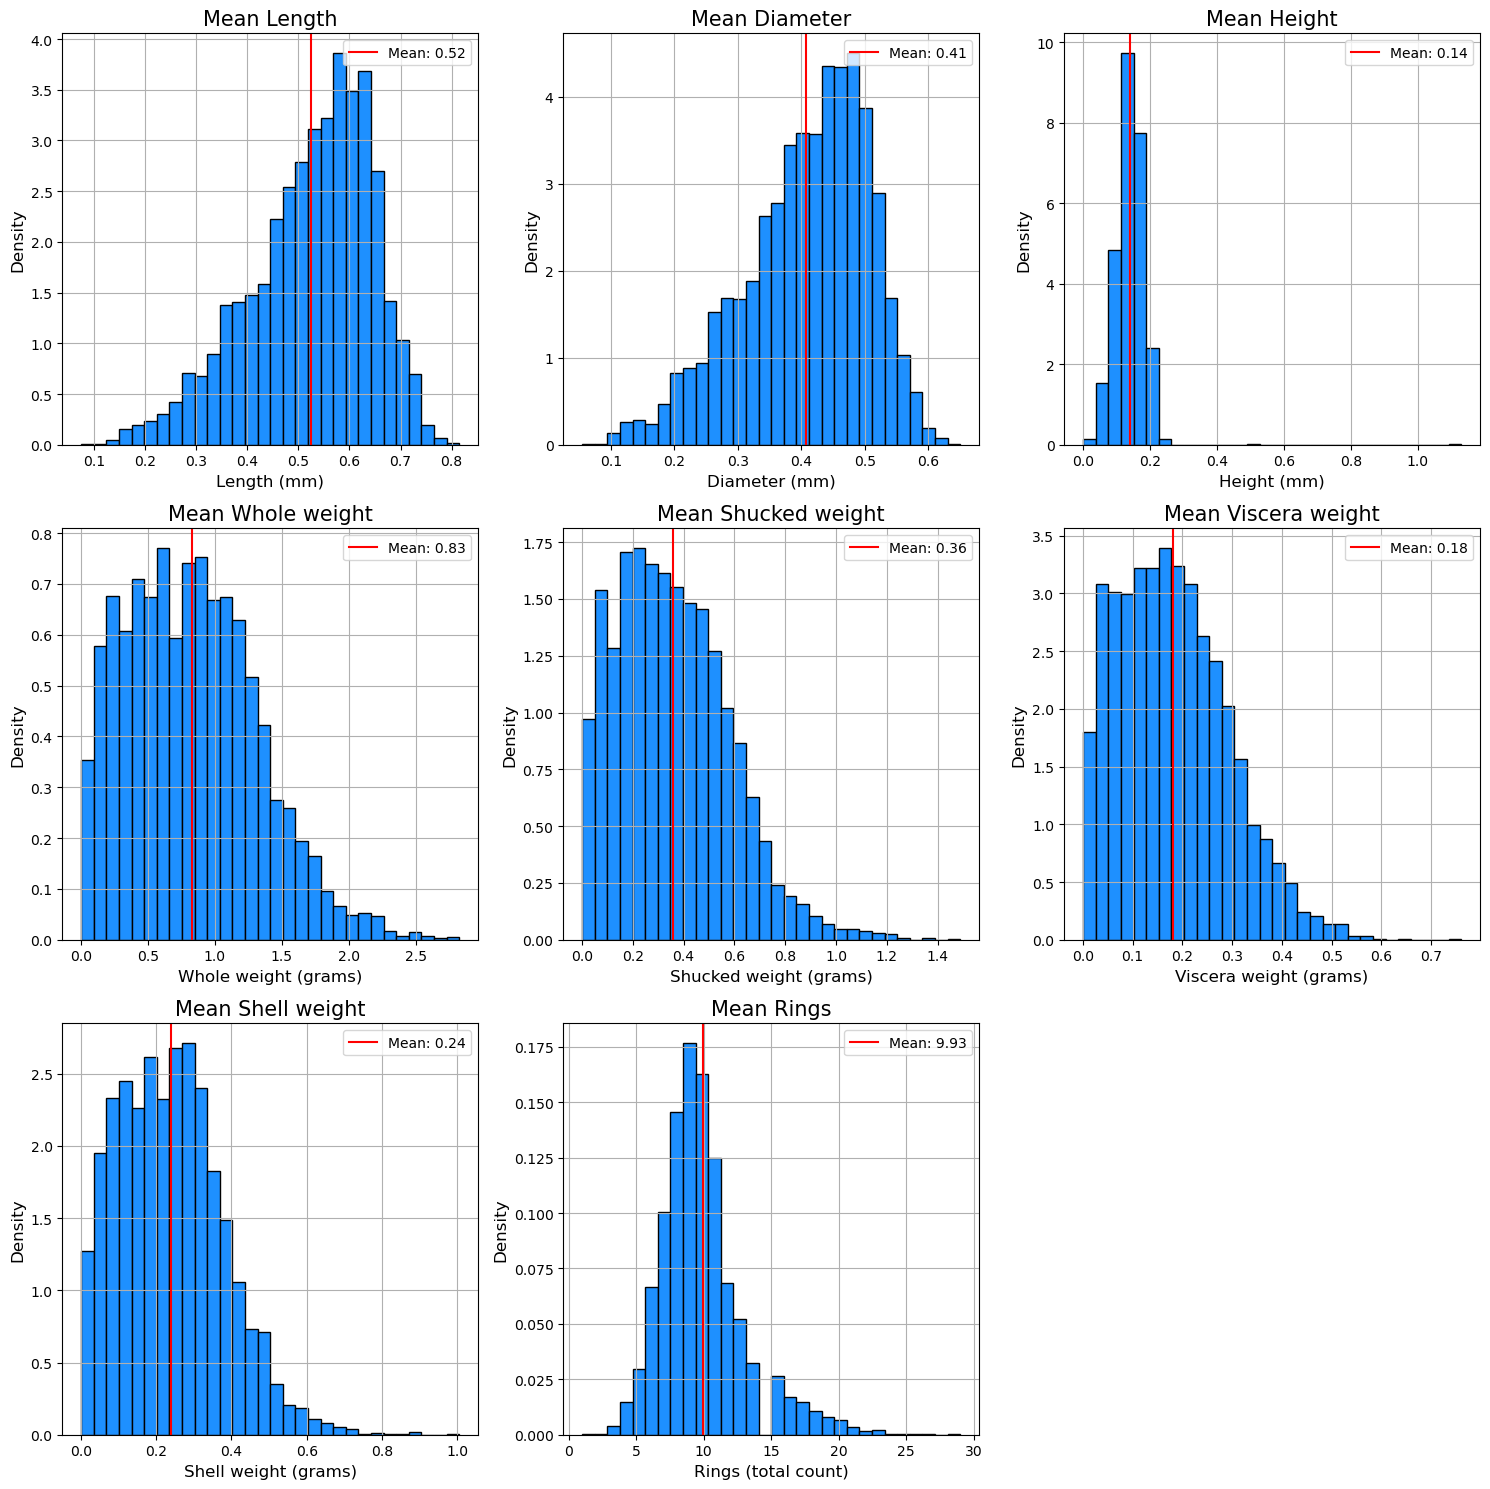

In [319]:
plotHistDensity(abaloneData, attributeInformation)

In [320]:
def plotSexColour(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Getting the units of the variables
    unit = attributeInformation['Meas.']
    sex = data['sex'].unique()

    # Color mapping
    color_map = {'M': 'dodgerblue', 'F': 'deeppink', 'I': 'limegreen'}

    # Making the plot large, as there is good quality given the large sample size
    plt.figure(figsize=(15, 15))

    for i in range(1, 8):
        plt.subplot(3, 3, i)
    
        x = data['rings'] + 1.5  # Assuming age = rings + 1.5
        y = data[abaloneCols[i]]

        # Plot each sex
        for sex_val in sex:
            indx = data['sex'] == sex_val
            plt.scatter(x[indx], y[indx], s=100, color=color_map.get(sex_val, 'grey'), label=sex_val, alpha=0.5)

        # Adding a title and label and gridlines as part of the function
        plt.title(str(abaloneColsNames[i]), size=15, color='black')
        plt.xlabel('Age')
        plt.ylabel(f"{abaloneColsNames[i]} ({unit[i]})", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        x_min, x_max = plt.xlim()
        if x_min > 0:
            x_min = 0
        plt.xlim(x_min, x_max)
        x_ticks = plt.xticks()[0]
        if 0 not in x_ticks:
            plt.xticks(list(x_ticks) + [0])

        # Adding a tick at 0 on the y-axis
        y_min, y_max = plt.ylim()
        if y_min > 0:
            y_min = 0
        plt.ylim(y_min, y_max)
        y_ticks = plt.yticks()[0]
        if 0 not in y_ticks:
            plt.yticks(list(y_ticks) + [0])

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

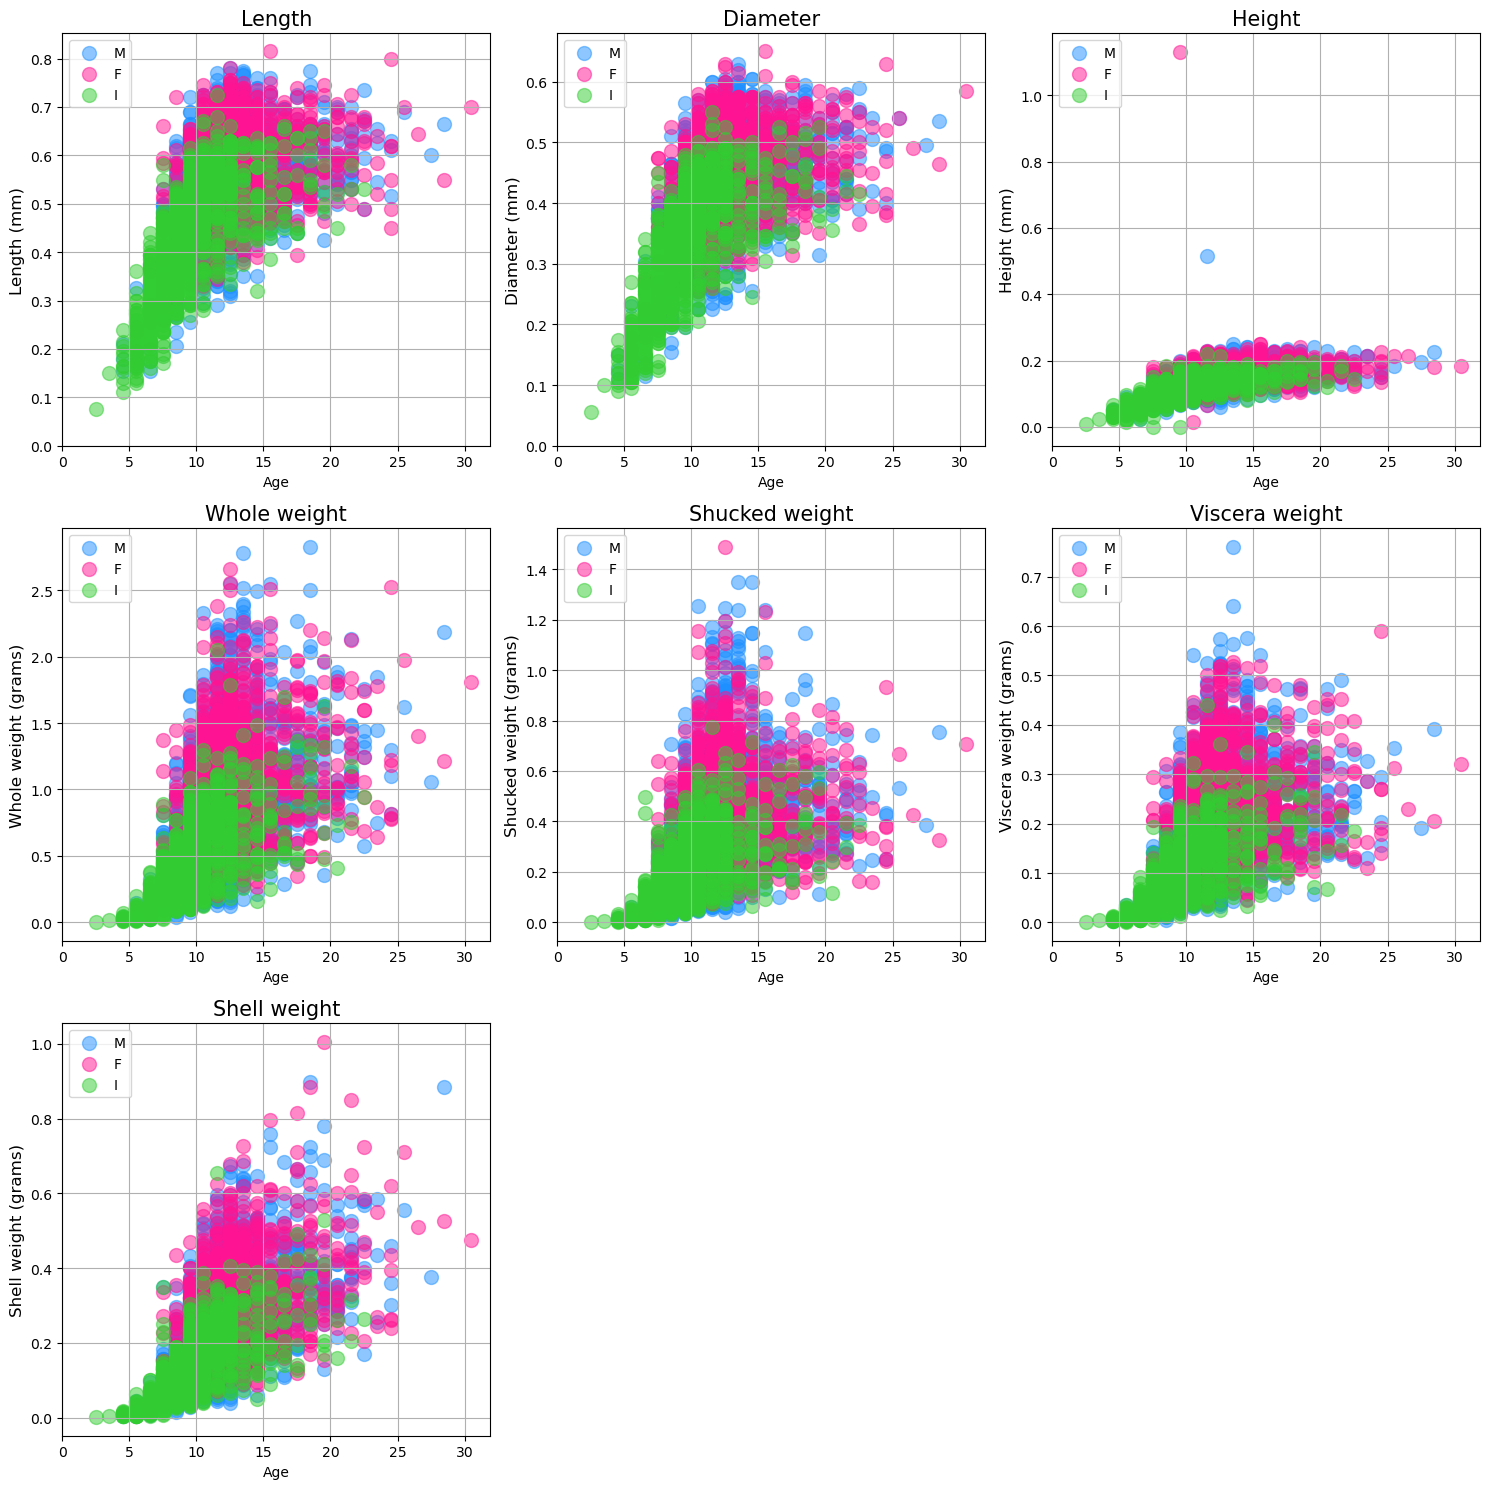

In [321]:
plotSexColour(abaloneData, attributeInformation)

### Errorbar subsampling

In [322]:
def plotAverageBySexWithErrorBars(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Getting the units of the variables
    unit = attributeInformation['Meas.']
    sex = data['sex'].unique()

    # Color mapping
    color_map = {'M': 'dodgerblue', 'F': 'deeppink', 'I': 'limegreen'}

    # Making the plot large
    plt.figure(figsize=(15, 15))

    for i in range(1, 8):
        plt.subplot(3, 3, i)
    
        # Isolating variable to be plotted
        y_var = abaloneCols[i]

        # Calculate the mean and standard error for each sex at each age
        stats_data = data.groupby(['rings', 'sex'])[y_var].agg(['mean', 'std', 'count']).reset_index()
        stats_data['sem'] = stats_data['std'] / np.sqrt(stats_data['count'])  # Standard Error

        # Plot the means with error bars
        for sex_val in sex:
            sex_data = stats_data[stats_data['sex'] == sex_val]
            plt.errorbar(sex_data['rings'] + 1.5, sex_data['mean'], yerr=sex_data['sem'], 
                         marker='o', linestyle='none', color=color_map.get(sex_val, 'grey'), label=sex_val, alpha = 0.75)

        # Adding a title and labels
        plt.title(f"Mean {abaloneColsNames[i]}", size=15, color='black')
        plt.xlabel('Age')
        plt.ylabel(f"{abaloneColsNames[i]} ({unit[i]})", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        x_min, x_max = plt.xlim()
        if x_min > 0:
            x_min = 0
        plt.xlim(x_min, x_max)
        x_ticks = plt.xticks()[0]
        if 0 not in x_ticks:
            plt.xticks(list(x_ticks) + [0])

        # Adding a tick at 0 on the y-axis
        y_min, y_max = plt.ylim()
        if y_min > 0:
            y_min = 0
        plt.ylim(y_min, y_max)
        y_ticks = plt.yticks()[0]
        if 0 not in y_ticks:
            plt.yticks(list(y_ticks) + [0])

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


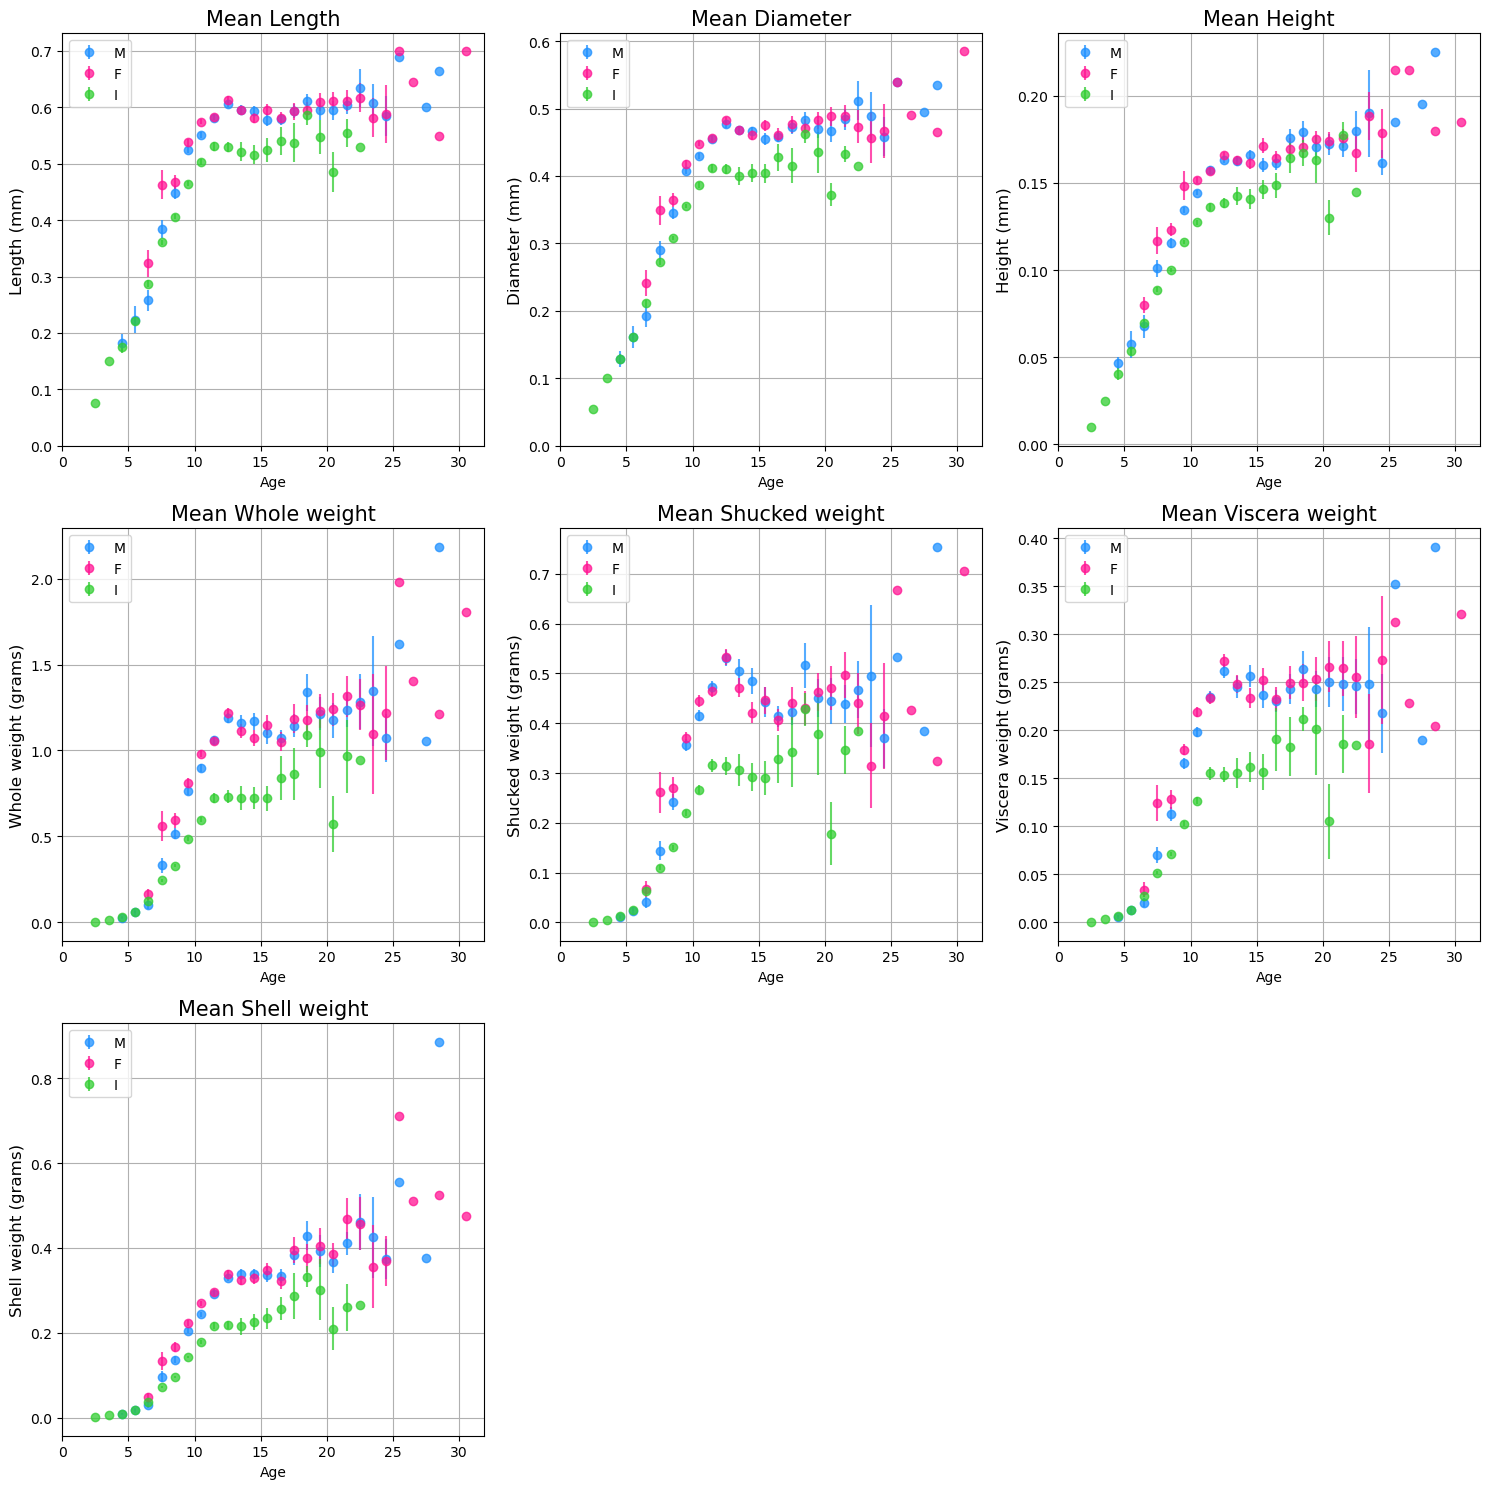

In [323]:
plotAverageBySexWithErrorBars(abaloneData, attributeInformation)